### Student Information
Name:李緯倫

Student ID:109062109

GitHub ID:waylon620

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [2]:
import pandas as pd
from io import StringIO  # Required to read from a string

In [3]:
### Begin Assignment Here

with open('./sentiment+labelled+sentences/sentiment labelled sentences/amazon_cells_labelled.txt', 'r') as file:
    file_contents = file.read()
    
# Read the string as a DataFrame
df = pd.read_csv(StringIO(file_contents), sep='\t', header=None, names=["sentence", "score"])

# Print the DataFrame
# print(df)


In [4]:
import pandas as pd
from io import StringIO
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
# Initialize an empty DataFrame to store the combined data
data = pd.DataFrame(columns=["sentence", "score"])

# List of file paths to be combined
file_paths = [
    './sentiment+labelled+sentences/sentiment labelled sentences/amazon_cells_labelled.txt',
    './sentiment+labelled+sentences/sentiment labelled sentences/imdb_labelled.txt',
    './sentiment+labelled+sentences/sentiment labelled sentences/yelp_labelled.txt'
]

# Loop through the file paths and read and concatenate the data
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        file_contents = file.read()
    
    # Read the string as a DataFrame
    df = pd.read_csv(StringIO(file_contents), sep='\t', header=None, names=["sentence", "score"])
    
    # Concatenate the current DataFrame with the combined DataFrame
    data = pd.concat([data, df], ignore_index=True)

data[0:2]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1


### exercise 1

In [5]:
for t in data["sentence"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


### exercise 2

In [6]:
data.iloc[::10, 0]

0       So there is no way for me to plug it in here i...
10                        And the sound quality is great.
20      I went on Motorola's website and followed all ...
30      This is a simple little phone to use, but the ...
40      It has a great camera thats 2MP, and the pics ...
                              ...                        
2700    The ambiance here did not feel like a buffet s...
2710    She was quite disappointed although some blame...
2720    Unfortunately, it only set us up for disapppoi...
2730                              Food was below average.
2740    A lady at the table next to us found a live gr...
Name: sentence, Length: 275, dtype: object

### exercise 3

In [7]:
# show the top five of every 10 score == 1 data 
data.loc[(data['score'] == 1)][::10][:5]

,sentence,score
1,"Good case, Excellent value.",1
21,I bought this to use with my Kindle Fire and a...,1
44,Excellent bluetooth headset.,1
61,I really recommend this faceplates since it lo...,1
78,"I love this phone , It is very handy and has a...",1


### exercise 4

In [8]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)
data.isnull().apply(lambda x: check_missing_values(x),axis =1)


0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

### exercise 5

In [9]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])

# Answer here
# why the isnull() did not work is that for "Nan" "None" and "" , isnull() will not take it as null
for item in NA_dict:
    if 'missing_example' in item:
        value = item['missing_example']
        if isinstance(value, str) and (value.lower() == 'nan' or value.lower() == 'none'):
            item['missing_example'] = np.nan
        elif value is None or value == '':
            item['missing_example'] = np.nan

NA_df = pd.DataFrame(NA_dict)

# Now, you can check for null values
missing_data = NA_df['missing_example'].isnull()
print(missing_data)

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool


### exercise 6

In [10]:
print(data.shape)
data_sample = data.sample(n=1000,random_state=42) #random state
display(data_sample)

(2748, 2)


,sentence,score
2516,"It's close to my house, it's low-key, non-fanc...",1
2642,If you stay in Vegas you must get breakfast he...,1
1359,"Let's start with all the problemsthe acting, ...",0
1702,It's too bad that everyone else involved didn'...,0
2660,"i felt insulted and disrespected, how could yo...",0
...,...,...
158,And I just love the colors!,1
1862,Good prices.,1
861,It was a waste of my money.,0
1307,About ten minutes into this film I started hav...,0


In [11]:
df_sum_pos = 0
df_sum_neg = 0
for i in data['score']:
    if i==1:
        df_sum_pos+=1
    else:
        df_sum_neg+=1        
print(df_sum_pos,df_sum_neg)

dfsample_sum_pos = 0
dfsample_sum_neg = 0
for i in data_sample['score']:
    if i==1:
        dfsample_sum_pos+=1
    else:
        dfsample_sum_neg+=1        
print(dfsample_sum_pos,dfsample_sum_neg)

# the size of the data, the order of the data, and the distribution of categories are different

1386 1362
475 525


### exercise 7

In [12]:
# Answer here

print(max(data_sample.score.value_counts()))
upper_bound = max(data_sample.score.value_counts() + 50) #525 + 50
print(data_sample.score.value_counts())

525
0    525
1    475
Name: score, dtype: int64


### exercise 8

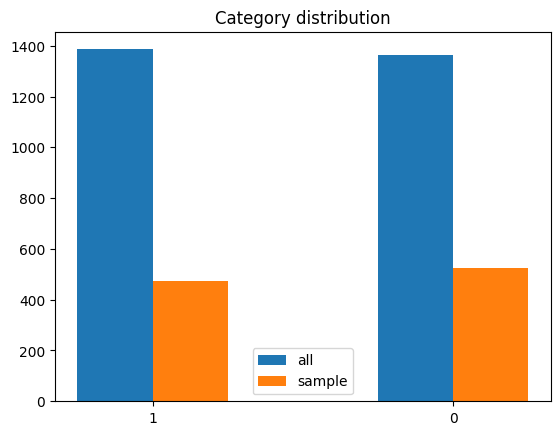

1    1386
0    1362
Name: score, dtype: int64
0    525
1    475
Name: score, dtype: int64


In [13]:
# Answer here
import matplotlib.pyplot as plt
import numpy as np
categories = ['pos', 'neg']
bar_width = 0.25
fig, ax = plt.subplots()
x = np.arange(len(data.score.value_counts()))

sample_order = data_sample.score.value_counts()

bar1 = ax.bar(x - bar_width/2, data.score.value_counts(), bar_width, label='all')
bar2 = ax.bar(x + bar_width/2, [sample_order[1],sample_order[0]], bar_width, label='sample')

# Add labels, title, and legend
ax.set_title('Category distribution')
ax.set_xticks([0 ,1])
ax.set_xticklabels(data.score.value_counts().index)
ax.legend()

# Show the plot
plt.show()
print(data.score.value_counts())
print(data_sample.score.value_counts())
#因為value_counts()會由大而小排，所以我在前面有做一次交換順序

### exercise 9

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence) #learn the vocabulary and return document-term matrix
print(data_counts.shape)
print(data_counts[0])

(2748, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [15]:
count_vect.get_feature_names_out()[1887]


'frozen'

In [16]:
count_vect.get_feature_names_out()[4161]


'so'

In [17]:
analyze = count_vect.build_analyzer()
analyze(data.sentence[0])


['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [18]:
data_counts.shape


(2748, 5155)

In [19]:
data_counts[0:10
            , 4150:4180].toarray()


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
count_vect.get_feature_names_out()[0:100]


array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17',
       '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973',
       '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005',
       '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30',
       '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44',
       '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb',
       '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85',
       '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned',
       'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad',
       'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse',
       'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable',
       'access', 'accessable', 'accessible', 'accessing', 'accessory',
       'accessoryone', 'accident', 'accidentally', 'acclaimed',
       'accolades', 'accommodations'], dtype=object)

### exercise 10

In [21]:
# Answer here
cnt = 4150
for i in data_counts[0, 4150:4180].toarray()[0]:
  if i!= 0:
    print(count_vect.get_feature_names_out()[cnt])
  cnt+=1


so


### exercise 11

5155
['term_clicks', 'term_all', 'term_audio', 'term_performance', 'term_activated', 'term_45', 'term_and', 'term_by', 'term_680', 'term_for', 'term_great', 'term_case', 'term_can', 'term_any', 'term_again', 'term_beautiful', 'term_worked', 'term_best', 'term_are', 'term_battery', 'term_as', 'term_doesn', 'term_enough', 'term_bluetooth', 'term_advertised', 'term_about', 'term_absolutely', 'term_cool', 'term_contacts', 'term_but']
['doc_1657', 'doc_1274', 'doc_2698', 'doc_1149', 'doc_264', 'doc_2166', 'doc_1494', 'doc_2529', 'doc_2608', 'doc_216', 'doc_1503', 'doc_1457', 'doc_1745', 'doc_507', 'doc_2160', 'doc_841', 'doc_1980', 'doc_29', 'doc_1207', 'doc_1301', 'doc_839', 'doc_454', 'doc_1244', 'doc_565', 'doc_604', 'doc_1342', 'doc_1416', 'doc_1850', 'doc_1443', 'doc_1917']
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

'remark\nI shuffle the data and get the first 30 terms\nI go through all the docs to find if it has the term inside, so i can guarantee that the elements are at least 1 on the diagonal.\n'

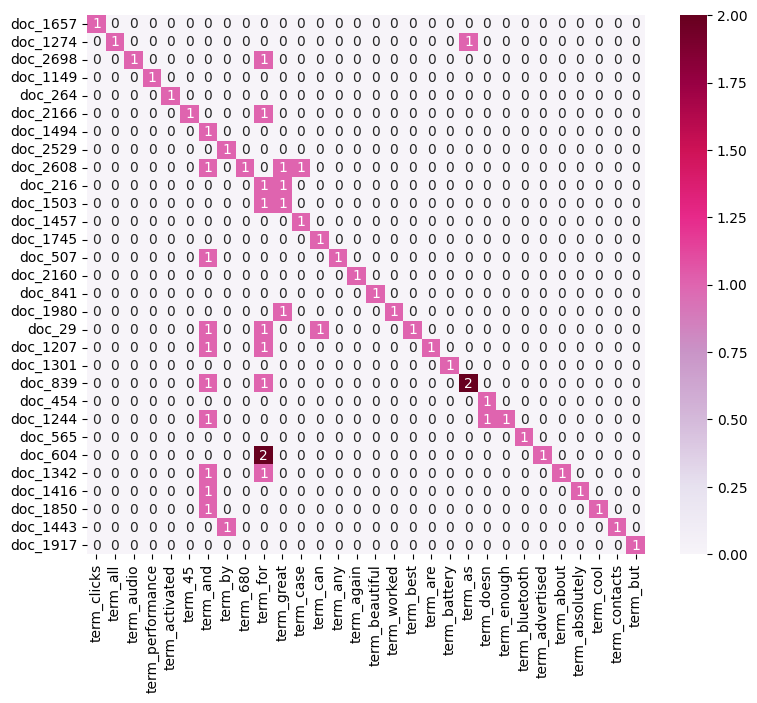

In [23]:
# Answer here
# print(count_vect.get_feature_names_out().shape)
# print(X_counts[0].shape)
# print(type(X_counts),type(X.text.index),type(X))
shuffled_indices = np.arange(100)
np.random.seed(10)
np.random.shuffle(shuffled_indices)
shuffle_doc = np.arange(len(data.sentence.index))
np.random.shuffle(shuffle_doc)
shuffled_data_counts = data_counts[shuffled_indices]
print(shuffled_data_counts[0].shape[1])
# print(shuffle_doc)
shuffled_feature_names = count_vect.get_feature_names_out()[shuffled_indices]
cnt = 0
t = []
tt = []
val = []
for _ in range(30):
    row = [0] * 30  # Create a row with 30 zeros
    val.append(row)
for i in range(30):
  for j in range(shuffled_data_counts[0].shape[1]):
    if shuffled_data_counts[i,j]!=0:
      flag = 1
      for _ in t:
        if count_vect.get_feature_names_out()[j] == _ :
          flag = 0
          break
      if flag :
        t.append(count_vect.get_feature_names_out()[j])
        tt.append(j)
        break
for i in range(30):
  cnt = 0
  for j in tt:
    val[i][cnt] = data_counts[shuffled_indices[i],j]
    cnt+=1
# first thirty features only
plot_x = ["term_"+str(i) for i in t[:30]]
print(plot_x)
plot_y = ["doc_"+ str(i) for i in shuffle_doc[:30]]
print(plot_y)
plot_z = val[:30][:30] #X_counts[how many documents, how many terms]
# print(val[:30][:30])
print(plot_z)
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

'''remark
I shuffle the data and get the first 30 terms
I go through all the docs to find if it has the term inside, so i can guarantee that the elements are at least 1 on the diagonal.
'''

### exercise 12

In [30]:
# Answer here
categories = [0,1]
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the Axes3D module
col = [ 'blue', 'red']
X_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())
print(X_reduced.shape)


(2748, 3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


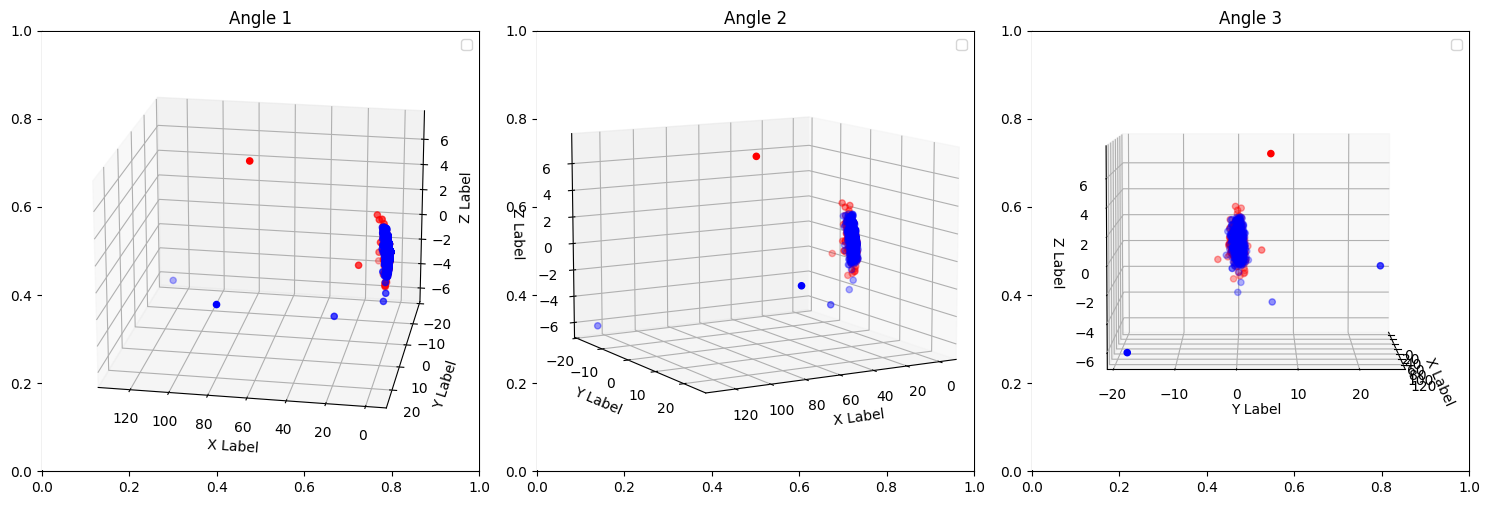

'\n I find out that black dots are separate from others. And the blue dots are relatively condensed.\n'

In [28]:
# Create a figure with three subplots in a single row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Set different camera angles for each subplot
view_angles = [(20, 100), (10, 60), (5, 00)]  # (elev, azim) angles for each subplot

for i, ax in enumerate(axs):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    ax.set_title(f'Angle {i + 1}')

    for c, category in zip(col, categories):
        xs = X_reduced[data['score'] == category].T[0]
        ys = X_reduced[data['score'] == category].T[1]
        zs = X_reduced[data['score'] == category].T[2]

        ax.scatter(xs, ys, zs, c=c, marker='o')

    # Set labels and legend
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.legend()

    # Set the camera angle
    ax.view_init(elev=view_angles[i][0], azim=view_angles[i][1])

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

'''
 I find out that most of the dots are in the same dstribution, only a few dots are seperates from others.
'''

### exercise 13

In [36]:
import plotly.express as px

x_data = count_vect.get_feature_names_out()[:300]
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
y_data = term_frequencies[:300]

fig = px.bar(x=x_data, y=y_data, text=y_data, labels={'x': 'Terms', 'y': 'Frequencies'})

fig.update_xaxes(tickangle=90)
fig.update_layout(width=1000, height=400)
fig.show()

### exercise 14

In [41]:
term=[]
freq=[]

for i , j in zip(count_vect.get_feature_names_out(),term_frequencies):
    if j>200:
        term.append(i)
        freq.append(j)
   
fig = px.bar(x=term,y=freq)

# showing the plot
fig.show()

### exercise 15

In [42]:
# Answer here
sort_data=sorted(list(zip(freq,term)),reverse=True)

freq, term = zip(*sort_data)


fig = px.bar(x=term,y=freq)

# showing the plot
fig.show()


### new data visualizations

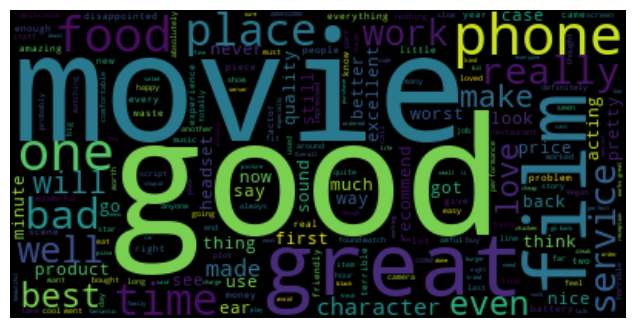

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text_data = " ".join(data['sentence'])

wordcloud = WordCloud().generate(text_data)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


So there is no way for me to plug it in here in the US unless I go by a converter. Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!! I have to jiggle the plug to get it to line up right to get decent volume. If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one. Needless to say, I wasted my money. What a waste of money and time!. If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset. The design is very odd, as the ear "clip" is not very comfortable at all. I advise EVERYONE DO NOT BE FOOLED! It clicks into place in a way that makes you wonder how long that mechanism would last. I went on Motorola's website and followed all directions, but could not get it to pair again. The commercials are the most misleading. I bought it for my mother and she had a problem with the battery. I didn't think that the instructions provided were helpful to me. P

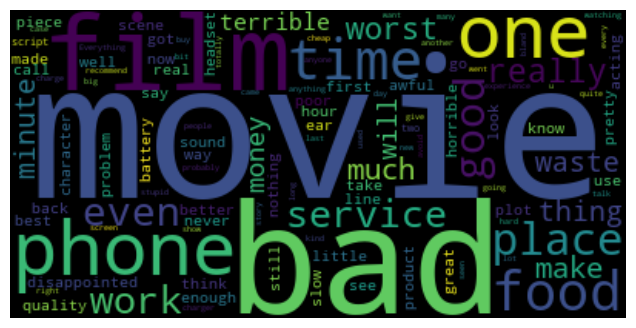

In [107]:
text_data = " ".join(data[data['score'] == 0]['sentence'])
# print(text_data)

wordcloud = WordCloud().generate(text_data)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Good case, Excellent value. Great for the jawbone. The mic is great. If you are Razr owner...you must have this! And the sound quality is great. He was very impressed when going from the original battery to the extended battery. Very good quality though Highly recommend for any one who has a blue tooth phone. So Far So Good!. Works great!. I bought this to use with my Kindle Fire and absolutely loved it! I have yet to run this new battery below two bars and that's three days without charging. Great Pocket PC / phone combination. I've owned this phone for 7 months now and can say that it's the best mobile phone I've had. This product is ideal for people like me whose ears are very sensitive. Car charger as well as AC charger are included to make sure you never run out of juice.Highy recommended It has kept up very well. The case is great and works fine with the 680. It has a great camera thats 2MP, and the pics are nice and clear with great picture quality. Nice headset priced right. Ex

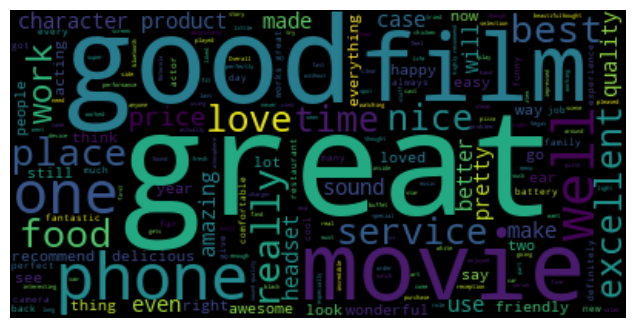

In [109]:
text_data = " ".join(data[data['score'] == 1]['sentence'])

print(text_data)
wordcloud = WordCloud().generate(text_data)


plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### TF-IDF

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

analyze = count_vect.build_analyzer()
# analyze(data.sentence[0])
token = analyze("".join(list(data[:len(data)].sentence)))
# print(len(token))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data.sentence)
print(tfidf_matrix.toarray())
feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['00' '10' '100' ... 'zillion' 'zombie' 'zombiez']


In [84]:
print(tfidf_matrix)

  (0, 1013)	0.39724820817666917
  (0, 647)	0.22555088175536459
  (0, 1982)	0.2306390246139404
  (0, 4793)	0.33030032253491776
  (0, 4835)	0.2733799006395169
  (0, 4531)	0.0881625510871022
  (0, 2158)	0.22094809666369034
  (0, 2314)	0.3010444787413116
  (0, 2432)	0.1210781906805114
  (0, 3387)	0.3068538434603926
  (0, 4609)	0.12778803811565193
  (0, 2809)	0.22839244785930268
  (0, 1829)	0.15591937844583587
  (0, 4987)	0.24797344916079914
  (0, 3043)	0.22352431764234307
  (0, 2427)	0.12236392895361783
  (0, 4545)	0.2102974927707943
  (0, 4161)	0.1865424331491731
  (1, 4861)	0.634632538811654
  (1, 1603)	0.4708610003994393
  (1, 713)	0.5119613502505376
  (1, 1993)	0.33678930332473467
  (2, 2449)	0.8223501692786147
  (2, 2023)	0.39972832078030696
  (2, 4531)	0.19930076345450964
  :	:
  (2747, 1387)	0.29231371393938493
  (2747, 5110)	0.29231371393938493
  (2747, 3437)	0.29231371393938493
  (2747, 3857)	0.2676820294037227
  (2747, 2068)	0.27790510215642933
  (2747, 588)	0.2430503448680605
  